# Importación librerías

In [1]:
# Realizar instalación de MySQL a Python
%pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
!python -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


# Conexión MySQL

In [3]:
import mysql.connector as sql  #Aquí importamos la librería mysql.connector renombrándola como sql.

mydb= sql.connect(        #En este bloque establecemos la conexión, para ello necesitamos el host, user, contraseña y la base de datos en cuestión, en este caso Equip_D.
    host= "212.227.90.6",
    user="EquipoE",
    password="E1q2u3i4p5oE",
    database="Equip_E")
print(mydb)

In [4]:
import pandas as pd               #Aquí importamos varias librerías de Python como Pandas, Matplotlib y Seaborn.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Tourist_Accommodation10032025 = pd.read_sql("SELECT * FROM Tourist_Accommodation", mydb)     #Aquí cargamos las tablas de Equip_E

C:\Users\sguti\AppData\Local\Temp\ipykernel_13612\1778371461.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Tourist_Accommodation10032025 = pd.read_sql("SELECT * FROM Tourist_Accommodation", mydb)     #Aquí cargamos las tablas de Equip_E


# Información general del Dataset

In [5]:
df = Tourist_Accommodation10032025
pd.set_option('display.max_columns', None)
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,5.0,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019


In [6]:
df.shape

(10000, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 10000 non-null  int64  
 1   name                         9997 non-null   object 
 2   description                  9862 non-null   object 
 3   host_id                      10000 non-null  int64  
 4   neighbourhood_name           10000 non-null  object 
 5   neighbourhood_district       6079 non-null   object 
 6   room_type                    10000 non-null  object 
 7   accommodates                 10000 non-null  int64  
 8   bathrooms                    9926 non-null   object 
 9   bedrooms                     9930 non-null   object 
 10  beds                         9955 non-null   float64
 11  amenities_list               9983 non-null   object 
 12  price                        9746 non-null   float64
 13  minimum_nights   

In [8]:
df = pd.read_sql("SELECT * FROM Tourist_Accommodation10032025 LIMIT 20000", mydb)
print(len(df))


C:\Users\sguti\AppData\Local\Temp\ipykernel_13612\1424502000.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM Tourist_Accommodation10032025 LIMIT 20000", mydb)


15000


In [9]:
registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {Tourist_Accommodation10032025.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 15000
Total de duplicados exactos: 0
El número de apartment_id duplicados es: 5350


# Limpieza y modificaciones para el rol de Marketing

In [10]:
# Lista de columnas a convertir en int pero si alguna de ellas tiene valor NaN pasará a 1, ya que todos los alohamientos tienen al menos una cama, una habitación y un baño
columnas_numericas = ["bathrooms", "bedrooms", "beds"]

for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # Convertir a número, NaN si hay errores
    df[col].fillna(1, inplace=True)  # Reemplazar NaN con 1
    df[col] = df[col].astype(int)  # Convertir a entero

# Verificar los tipos de datos después de la conversión
print(df[columnas_numericas].dtypes)

bathrooms    int64
bedrooms     int64
beds         int64
dtype: object


C:\Users\sguti\AppData\Local\Temp\ipykernel_13612\1584102728.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(1, inplace=True)  # Reemplazar NaN con 1
C:\Users\sguti\AppData\Local\Temp\ipykernel_13612\1584102728.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [11]:
# Convertir columnas a formato datetime
columnas_fechas = ["insert_date", "last_review_date", "first_review_date"]
for col in columnas_fechas:
    df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)

# Verificar que ahora son fechas
print(df[columnas_fechas].dtypes)

insert_date          datetime64[ns]
last_review_date     datetime64[ns]
first_review_date    datetime64[ns]
dtype: object


In [ ]:
#NOTA: Para el precio, si queremos hacer la media, que se la MEDIA PONDERADA. Y que no sea solamente teniendo en cuenta el rromtype. Sino que sea segun también la capacidad del alojamineto etc..

#Mirar que variables pueden influir en el precio. 

In [12]:
# Imputaciones
# Columnas numéricas mejor con mediana ya que los outliers nos pueden afectar. Por ejemplo puede haber casas con 50 baños, pero no es lo habitual.
df["minimum_nights"].fillna(df["minimum_nights"].median(), inplace=True)
df["maximum_nights"].fillna(df["maximum_nights"].median(), inplace=True)
# Reemplazar los nulos en 'price' con la mediana del 'price' según 'room_type'
df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))
df["review_scores_location"].fillna(0, inplace=True)

# Columnas de disponibilidad
df["availability_30"].fillna(df["availability_30"].mean(), inplace=True)
df["availability_60"].fillna(df["availability_60"].mean(), inplace=True)
df["availability_90"].fillna(df["availability_90"].mean(), inplace=True)
df["availability_365"].fillna(df["availability_365"].mean(), inplace=True)
# Columnas categóricas
df["neighbourhood_district"].fillna("Desconocido", inplace=True)
df["has_availability"].fillna("unknown", inplace=True)
# Columnas de texto
df["name"].fillna("Desconocido", inplace=True)
df["description"].fillna("No disponible", inplace=True)
df['amenities_list'] = df['amenities_list'].fillna("Sin información")

C:\Users\sguti\AppData\Local\Temp\ipykernel_13612\770239323.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["minimum_nights"].fillna(df["minimum_nights"].median(), inplace=True)
C:\Users\sguti\AppData\Local\Temp\ipykernel_13612\770239323.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [13]:
df.isnull().sum()

apartment_id                      0
name                              0
description                       0
host_id                           0
neighbourhood_name                0
neighbourhood_district            0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities_list                    0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              3881
last_review_date               3884
review_scores_rating           4040
review_scores_accuracy         4053
review_scores_cleanliness      4044
review_scores_checkin          4062
review_scores_communication 

In [14]:
# Ordenar los datos por insert_date en orden ascendente (los más antiguos primero)
df_sorted = df.sort_values(by="insert_date", ascending=True)

# Eliminar duplicados, manteniendo el primero (el más antiguo)
df_sin_duplicados = df_sorted.drop_duplicates(subset="apartment_id", keep="first")

# Contar cuántos registros duplicados fueron eliminados
duplicados_eliminados = len(df) - len(df_sin_duplicados)

print(f"Total de duplicados eliminados: {duplicados_eliminados}")


Total de duplicados eliminados: 5350


# Desafío
## Pregunta de Negocio
Analista de Marketing y Estrategia Comercial: ¿Qué características de los alojamientos (comodidades, capacidad y puntuación de la zona) están más relacionadas con los precios en cada ciudad?

### Análisis de Comodidades (amenities_list) y su Relación con el Precio

In [15]:
# Transformar amenities_list en listas reales
df["amenities_list"] = df["amenities_list"].apply(lambda x: x.split(",") if isinstance(x, str) else [])

In [16]:
# Crear una nueva columna con el número de comodidades
df["num_amenities"] = df["amenities_list"].apply(len)

# Ver relación entre número de comodidades y precio
df[["num_amenities", "price"]].corr()


,num_amenities,price
num_amenities,1.000000,0.092279
price,0.092279,1.000000


num_amenities y price tienen una correlación de 0.0923.
Este valor es muy bajo, lo que indica que el número de comodidades no tiene una relación fuerte con el precio.
Prácticamente no hay dependencia entre ambas variables, por lo que tener más o menos comodidades no parece afectar el precio significativamente.

Realizamos igualmente Test Pearson para asegurarnos

In [17]:
from scipy.stats import pearsonr

# Calcular p-valor
corr, p_value = pearsonr(df["num_amenities"], df["price"])

print(f"Coeficiente de correlación: {corr:.4f}")
print(f"P-valor: {p_value:.4f}")


Coeficiente de correlación: 0.0923
P-valor: 0.0000


1️⃣ El coeficiente de correlación (r = 0.0923) es muy bajo, lo que indica que num_amenities no influye significativamente en price.<br>
2️⃣ El p-valor (p = 0.0000) indica que la correlación es estadísticamente significativa, lo que significa que hay una relación real, aunque sea débil.<br>
3️⃣ Conclusión práctica: Tener más comodidades no impacta mucho en el precio. Otras variables como accommodates (capacidad) o review_scores_location (puntuación de ubicación) podrían ser más relevantes para predecir el precio.<br>

In [18]:
from collections import Counter
# Contar las comodidades más repetidas
amenities_flat = [amenidad.strip() for lista in df["amenities_list"] for amenidad in lista]
amenities_count = Counter(amenities_flat)
print(amenities_count)

Counter({'Kitchen': 13614, 'Essentials': 13233, 'Washer': 12405, 'TV': 12358, 'Wifi': 12131, 'Hangers': 11629, 'Heating': 10885, 'Iron': 10741, 'Hair dryer': 10618, 'Air conditioning': 8985, 'Shampoo': 7992, 'Hot water': 7922, 'Refrigerator': 6482, 'Family/kid friendly': 6417, 'Dishes and silverware': 6229, 'Microwave': 6060, 'Elevator': 5933, 'Coffee maker': 5860, 'Laptop friendly workspace': 5821, 'Cooking basics': 5360, 'Bed linens': 5357, 'Oven': 4986, 'Host greets you': 4490, 'First aid kit': 4444, 'Stove': 4405, 'Long term stays allowed': 4277, 'Patio or balcony': 3710, 'Internet': 3597, 'Fire extinguisher': 3582, 'Dishwasher': 3505, 'Smoking allowed': 3469, 'Free parking on premises': 3468, 'Pool': 3387, 'Extra pillows and blankets': 3135, 'Dryer': 3038, 'Crib': 3036, 'Private entrance': 2880, 'Free street parking': 2874, 'Cable TV': 2508, 'Luggage dropoff allowed': 2475, 'High chair': 2463, 'Buzzer/wireless intercom': 2274, 'Pets allowed': 2106, 'Paid parking off premises': 208

In [19]:
# Obtener las 10 comodidades más comunes
comodidades_top = [amenity for amenity, _ in amenities_count.most_common(10)]
print(comodidades_top)

['Kitchen', 'Essentials', 'Washer', 'TV', 'Wifi', 'Hangers', 'Heating', 'Iron', 'Hair dryer', 'Air conditioning']


In [20]:
#Crear Variables Binarias para las Comodidades Más Comunes
# Crear una columna por cada comodidad más común (1 si está presente, 0 si no)
for amenidad in comodidades_top:
    df[amenidad] = df["amenities_list"].apply(lambda x: 1 if amenidad in x else 0)

# Verificar que las nuevas columnas se han creado
print(df[comodidades_top + ["price"]].head())

   Kitchen  Essentials  Washer  TV  Wifi  Hangers  Heating  Iron  Hair dryer  \
0        0           1       1   1     1        1        1     1           1   
1        1           1       1   1     1        1        1     1           1   
2        1           1       1   1     1        1        1     1           1   
3        1           1       1   1     1        1        1     1           1   
4        0           1       1   0     1        1        1     1           1   

   Air conditioning  price  
0                 1  400.0  
1                 1  170.0  
2                 1  990.0  
3                 0  400.0  
4                 0  900.0  


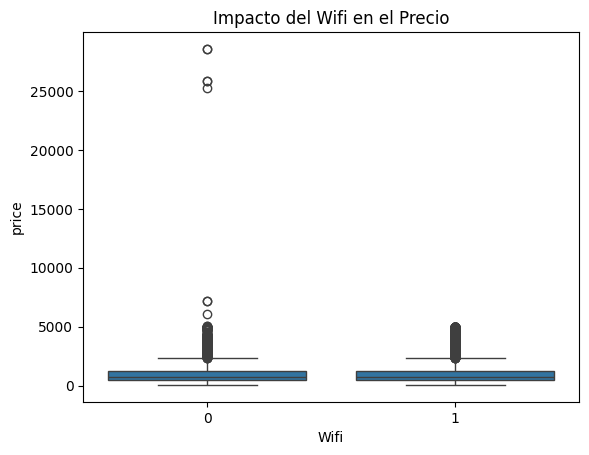

In [21]:
# Comparar el Precio según la Presencia de una Comodidad
sns.boxplot(x=df["Wifi"], y=df["price"])
plt.title("Impacto del Wifi en el Precio")
plt.show()

### Relación entre Capacidad (accommodates) y Precio

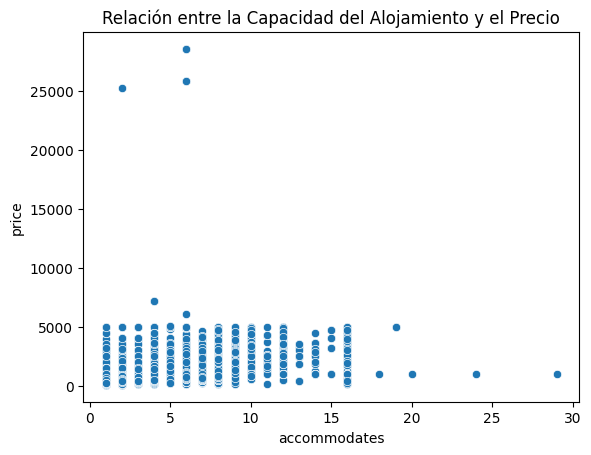

In [22]:
sns.scatterplot(x=df["accommodates"], y=df["price"])
plt.title("Relación entre la Capacidad del Alojamiento y el Precio")
plt.show()

In [23]:
from scipy.stats import pearsonr

# Calcular correlación y p-valor entre accommodates y price
corr, p_value = pearsonr(df["accommodates"], df["price"])

print(f"Coeficiente de correlación: {corr:.4f}")
print(f"P-valor: {p_value:.4f}")


Coeficiente de correlación: 0.4945
P-valor: 0.0000


📊 1️⃣ Interpretación del Coeficiente de Correlación (r = 0.4945)
El valor 0.4945 indica una correlación positiva moderada.
Esto significa que a mayor capacidad (accommodates), el precio (price) tiende a aumentar.
No es una relación perfecta (r no está cerca de 1), lo que indica que hay otros factores que también influyen en el precio.
📍 Ejemplo práctico:

Un apartamento con 1 o 2 personas puede costar 50€ - 100€.
Uno con 6-8 personas puede costar 200€ - 300€.
Pero no todos los alojamientos con alta capacidad son caros, porque puede haber ofertas económicas para grupos.

### Relación entre review_scores_location y Precio

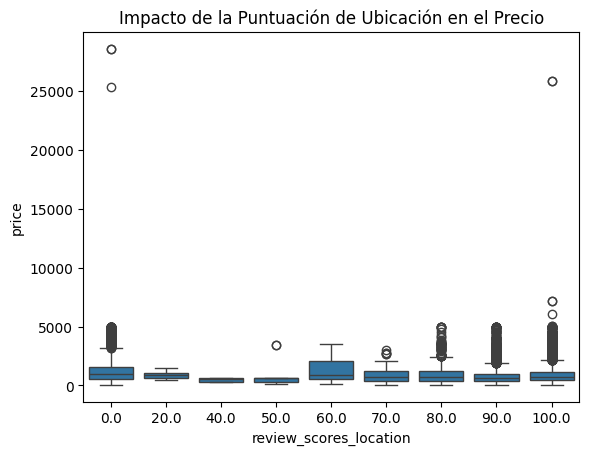

In [24]:
sns.boxplot(x=df["review_scores_location"], y=df["price"])
plt.title("Impacto de la Puntuación de Ubicación en el Precio")
plt.show()

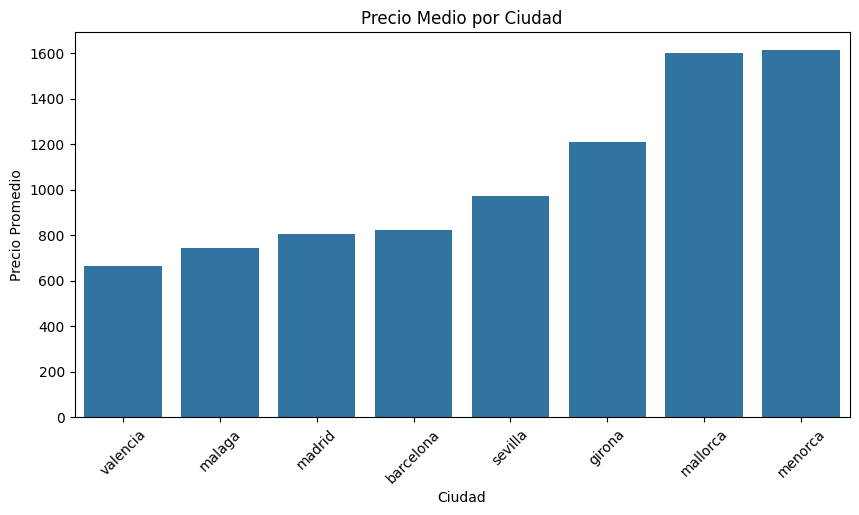

In [25]:
#Comparar precios promedio por ciudad para entender cómo varían los precios entre ciudades
# Graficar
df_ciudades = df.groupby("city")["price"].mean().sort_values()

# Graficar
plt.figure(figsize=(10,5))
sns.barplot(x=df_ciudades.index, y=df_ciudades.values)
plt.xticks(rotation=45)
plt.title("Precio Medio por Ciudad")
plt.ylabel("Precio Promedio")
plt.xlabel("Ciudad")
plt.show()


In [26]:
# Analizar la cantidad de alojamientos por ciudad
# Para ver si el precio medio está influenciado por una baja cantidad de anuncios en ciertas ciudades:
df_ciudades_count = df["city"].value_counts()
print(df_ciudades_count)


city
barcelona    4247
madrid       3289
mallorca     2490
girona       2289
sevilla       790
malaga        787
valencia      785
menorca       323
Name: count, dtype: int64


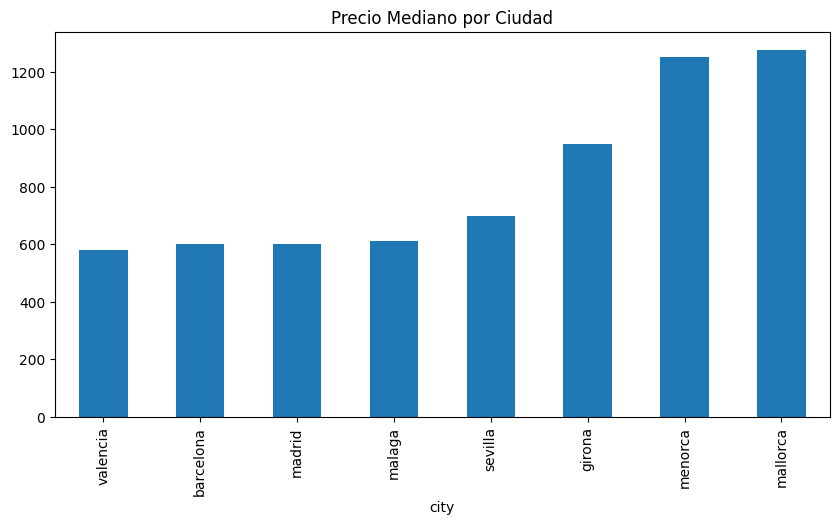

In [27]:
# Comparar los precios medianos en lugar de la media
# La media puede verse afectada por outliers, por lo que la mediana puede ser más representativa:
df_ciudades_median = df.groupby("city")["price"].median().sort_values()
df_ciudades_median.plot(kind="bar", figsize=(10,5), title="Precio Mediano por Ciudad")
plt.show()

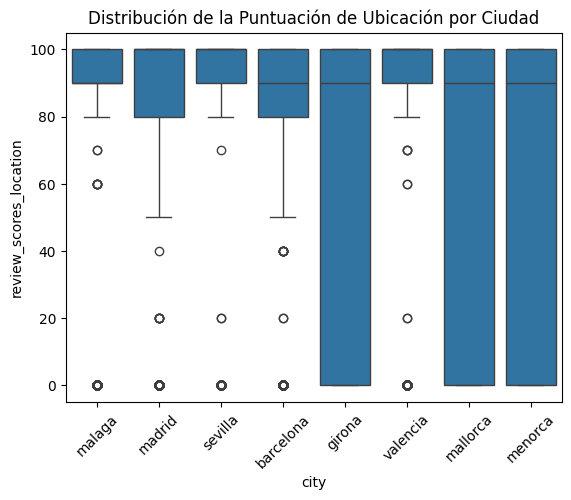

In [28]:
#Evaluar la relación entre precio y puntuación de ubicación (review_scores_location) por ciudad
sns.boxplot(x="city", y="review_scores_location", data=df)
plt.xticks(rotation=45)
plt.title("Distribución de la Puntuación de Ubicación por Ciudad")
plt.show()

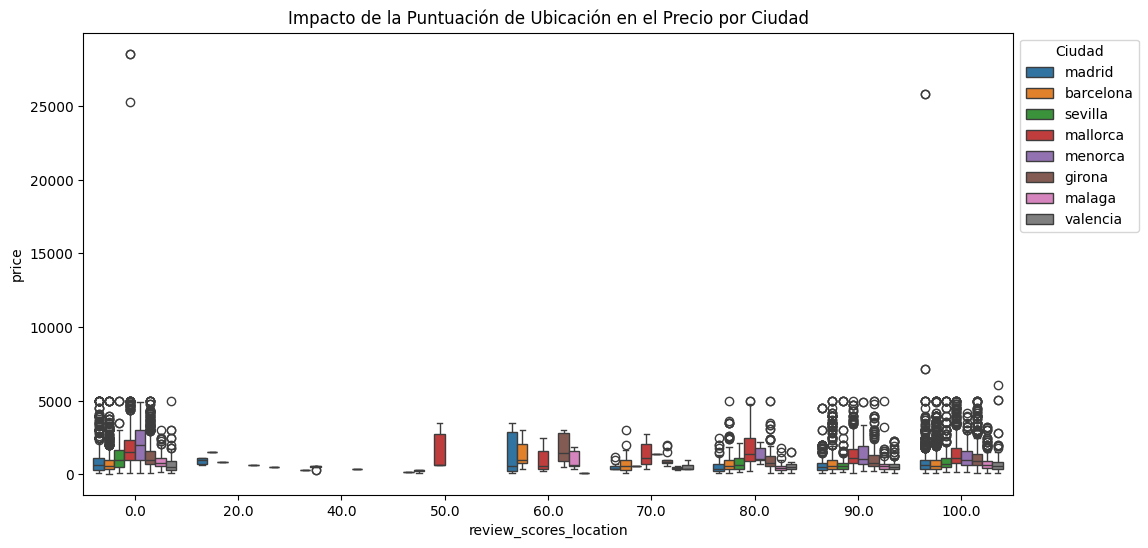

In [29]:
#Ver relación de review_scores_location y price por ciudad, y si la puntuación de ubicación afecta el precio en algunas ciudades más que en otras
plt.figure(figsize=(12,6))
sns.boxplot(x="review_scores_location", y="price", hue="city", data=df)
plt.title("Impacto de la Puntuación de Ubicación en el Precio por Ciudad")
plt.legend(title="Ciudad", bbox_to_anchor=(1,1))
plt.show()

In [30]:
from scipy.stats import pearsonr

# Calcular correlación y p-valor entre review_scores_location y price
corr, p_value = pearsonr(df["review_scores_location"], df["price"])

print(f"Coeficiente de correlación: {corr:.4f}")
print(f"P-valor: {p_value:.4f}")


Coeficiente de correlación: -0.1413
P-valor: 0.0000


📊 1️⃣ Interpretación del Coeficiente de Correlación (r = -0.1413)
r = -0.1413 indica una correlación negativa débil.
Significa que cuando una variable aumenta, la otra tiende a disminuir, pero la relación es débil.
Ejemplo: Si review_scores_location es la variable comparada con price, entonces mayores puntuaciones de ubicación pueden estar ligeramente asociadas con precios más bajos.
📌 Conclusión:

La relación no es fuerte, por lo que tener mejor puntuación de ubicación no garantiza precios más bajos.
Sin embargo, existe una ligera tendencia en esa dirección.
📊 2️⃣ Interpretación del P-Valor (p = 0.0000)
p = 0.0000 indica que la correlación es estadísticamente significativa.
Es decir, la relación observada entre las variables no es por azar.
Aunque la correlación es débil, el patrón existe en los datos.
📌 Conclusión:

Podemos confiar en que hay una relación entre las variables, aunque el impacto no sea fuerte.

Probamos otro tipo de test: El ANOVA (Análisis de Varianza) nos ayuda a ver si hay diferencias significativas en los precios de los alojamientos según su puntuación de ubicación.

In [31]:
from scipy.stats import f_oneway

# Crear grupos de precios según la puntuación de ubicación
grupos = [df[df["review_scores_location"] == score]["price"] for score in df["review_scores_location"].unique()]

# Aplicar test ANOVA
anova_result = f_oneway(*grupos)

# Mostrar resultados
print(f"Estadístico F: {anova_result.statistic:.4f}")
print(f"P-valor: {anova_result.pvalue:.4f}")


Estadístico F: 42.9289
P-valor: 0.0000


📊 1️⃣ Interpretación del Estadístico F (42.9289)<br>
Un estadístico F alto (42.9289) indica que hay diferencias significativas en los precios según la puntuación de ubicación (review_scores_location).<br>
Cuanto más grande es F, más probabilidad hay de que al menos uno de los grupos tenga una media de precios diferente a los demás.<br>
📊 2️⃣ Interpretación del P-Valor (0.0000)<be>
Como p < 0.05 (de hecho, es 0.0000), significa que las diferencias en los precios son estadísticamente significativas.<br>
Conclusión: El precio de los alojamientos varía según la puntuación de ubicación y esta diferencia no es aleatoria.<br>
📌 Conclusión Final<br>
📊 Los alojamientos con diferentes review_scores_location tienen precios significativamente distintos.<br>
📉 Esto confirma que la ubicación (o la percepción de la ubicación) influye en el precio.<br>
📈 El siguiente paso sería analizar cuáles puntuaciones tienen precios más altos y cuáles más bajos.<br>

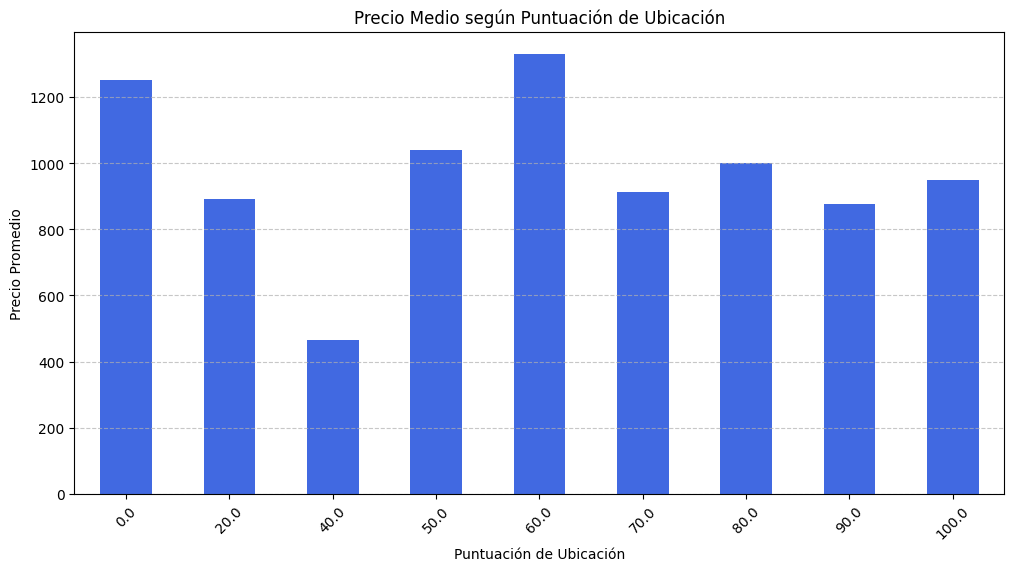

In [32]:
import matplotlib.pyplot as plt

# Calcular el precio promedio por puntuación de ubicación
df_location_price = df.groupby("review_scores_location")["price"].mean()

# Graficar
plt.figure(figsize=(12,6))
df_location_price.plot(kind="bar", color="royalblue")
plt.title("Precio Medio según Puntuación de Ubicación")
plt.xlabel("Puntuación de Ubicación")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [33]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable


In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Aplicar test de Tukey
tukey = pairwise_tukeyhsd(df["price"], df["review_scores_location"])

# Mostrar resultados
print(tukey)


C:\Users\sguti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\integrate\_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
   0.0   20.0 -357.6857 0.9054 -1161.4064   446.035  False
   0.0   40.0 -785.9974 0.1512 -1692.3829  120.3881  False
   0.0   50.0 -210.5428  0.999 -1161.0513  739.9656  False
   0.0   60.0   79.4572 0.9995  -317.5394  476.4537  False
   0.0   70.0 -336.6348  0.036  -661.9199  -11.3497   True
   0.0   80.0 -249.8317    0.0  -373.5218 -126.1415   True
   0.0   90.0 -374.6314    0.0  -447.6804 -301.5824   True
   0.0  100.0  -300.645    0.0  -359.5881 -241.7018   True
  20.0   40.0 -428.3117 0.9746 -1637.8836  781.2602  False
  20.0   50.0  147.1429    1.0 -1095.8357 1390.1215  False
  20.0   60.0  437.1429  0.848  -456.8011 1331.0868  False
  20.0   70.0   21.0509    1.0  -843.4373  885.5391  False
  20.0   80.0   107.854    1.0  -702.5957  918.3038  False
  20.0   90.0  -16.9457    1.0  -821.2253  787.3339  Fal

🔹 Conclusión:

Los alojamientos con review_scores_location = 0.0 tienden a tener precios significativamente más bajos que los de puntuaciones más altas.
Los alojamientos con puntuación 90 y 100 también tienen diferencias de precio significativas.
La ubicación influye en el precio, pero no de manera uniforme.
📉 2️⃣ Grupos que No Tienen Diferencias Significativas (reject = False)
Todos los demás pares tienen p-adj > 0.05, lo que significa que no hay una diferencia de precios significativa entre esas puntuaciones de ubicación.

🔹 Conclusión:

No todas las puntuaciones afectan el precio de manera fuerte.
Las diferencias más marcadas están entre las puntuaciones extremas (0.0 vs. 90-100.0).
📌 Conclusión Final
✅ Los alojamientos con puntuaciones de ubicación más bajas (0.0 - 70.0) tienen precios significativamente menores que los con 90 - 100.
✅ Las puntuaciones intermedias (20 - 80) no muestran grandes diferencias en precio.
✅ Este resultado confirma que la ubicación percibida sí impacta el precio, pero sobre todo en los extremos (muy mala vs. muy buena ubicación).

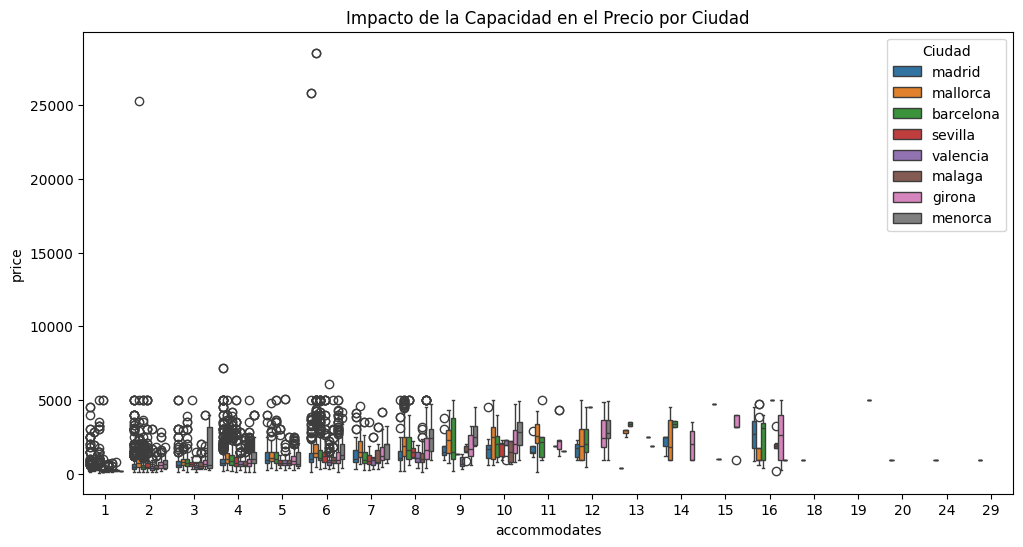

In [35]:
#Evaluar la capacidad (accommodates) en cada ciudad nos permitirá ver si la capacidad de huéspedes afecta el precio de forma diferente según la ciudad.
plt.figure(figsize=(12,6))
sns.boxplot(x="accommodates", y="price", hue="city", data=df)
plt.title("Impacto de la Capacidad en el Precio por Ciudad")
plt.legend(title="Ciudad", bbox_to_anchor=(1,1))
plt.show()

In [36]:
#Evaluar comodidades (amenities_list) por ciudad si queremos ver qué comodidades son más frecuentes en cada ciudad
from collections import Counter

# Contar comodidades más usadas por ciudad
comodidades_por_ciudad = df.groupby("city")["amenities_list"].sum().apply(lambda x: Counter(x).most_common(5))

# Mostrar las comodidades más comunes en cada ciudad
print(comodidades_por_ciudad)


city
barcelona    [(Essentials, 3406), (Kitchen, 3268), (Washer,...
girona       [(TV, 1948), (Kitchen, 1898), (Washer, 1735), ...
madrid       [(Essentials, 2505), (Kitchen, 2421), (Wifi, 2...
malaga       [(Essentials, 650), (Kitchen, 648), (TV, 624),...
mallorca     [(Kitchen, 1856), (TV, 1854), (Washer, 1789), ...
menorca      [(Kitchen, 264), (Washer, 246), (Essentials, 2...
sevilla      [(Essentials, 656), (Wifi, 654), (Hangers, 638...
valencia     [(Essentials, 550), (Wifi, 514), (Kitchen, 504...
Name: amenities_list, dtype: object


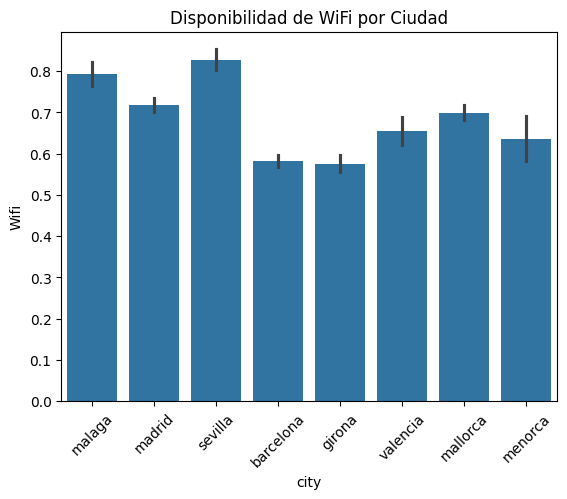

In [37]:
sns.barplot(x="city", y="Wifi", data=df)
plt.title("Disponibilidad de WiFi por Ciudad")
plt.xticks(rotation=45)
plt.show()

Gráficos que podemos usar en a presentación

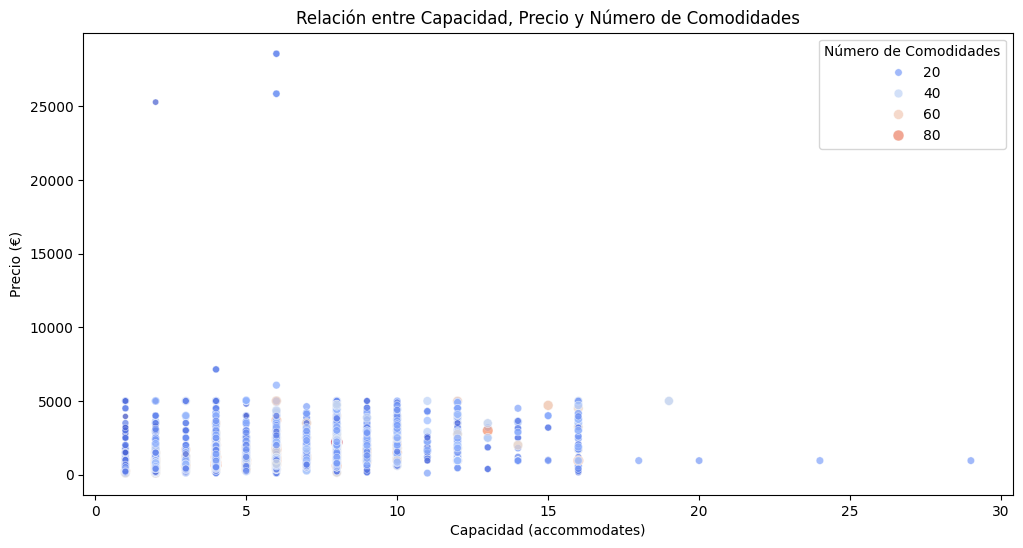

In [38]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["accommodates"], y=df["price"], size=df["num_amenities"], hue=df["num_amenities"], palette="coolwarm", alpha=0.7)
plt.title("Relación entre Capacidad, Precio y Número de Comodidades")
plt.xlabel("Capacidad (accommodates)")
plt.ylabel("Precio (€)")
plt.legend(title="Número de Comodidades", bbox_to_anchor=(1,1))
plt.show()


✅ La capacidad (accommodates) tiene una relación moderada con el precio, pero no es lineal.
✅ El número de comodidades (num_amenities) no tiene un impacto fuerte en el precio, aunque en algunos casos sí se observa que los alojamientos más caros tienen más comodidades.
✅ Existen outliers (precios extremadamente altos) que pueden estar influyendo en la media → Podría ser interesante eliminarlos y volver a analizar la tendencia.

C:\Users\sguti\AppData\Local\Temp\ipykernel_13612\3099912959.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(["city", "capacity_segment"])["price"].mean().unstack()


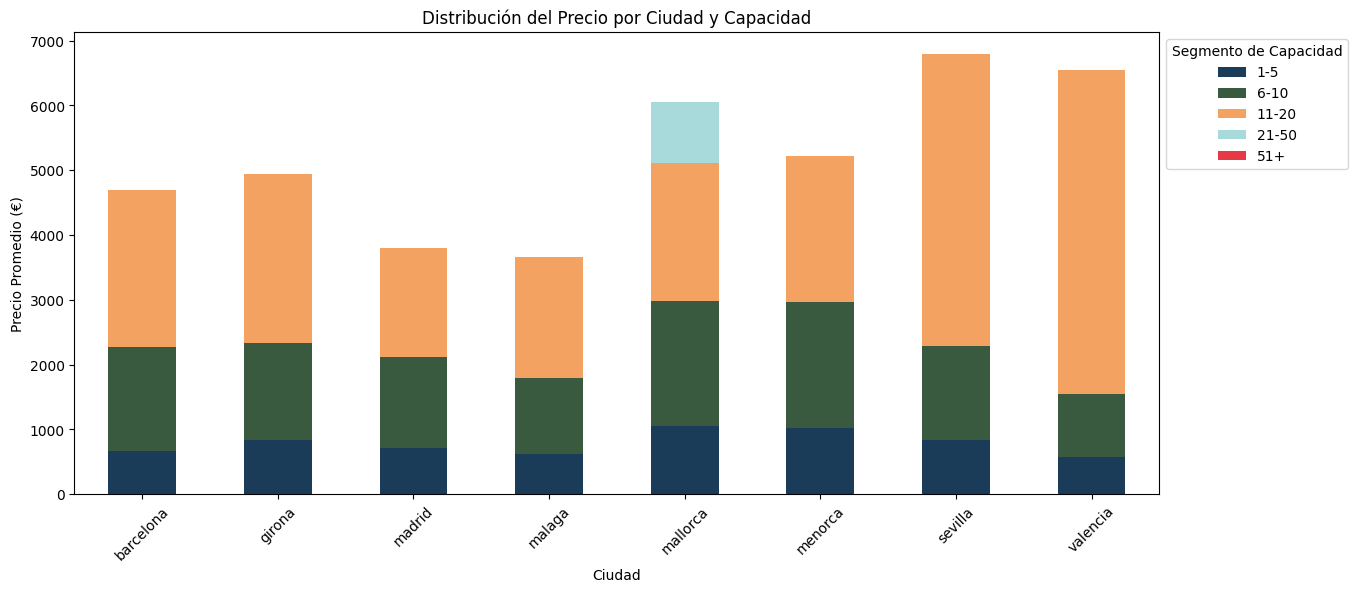

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir segmentos de capacidad
bins = [0, 5, 10, 20, 50, 100]  # Límites de cada segmento
labels = ["1-5", "6-10", "11-20", "21-50", "51+"]  # Etiquetas de los segmentos

# Crear una nueva columna con los segmentos de capacidad
df["capacity_segment"] = pd.cut(df["accommodates"], bins=bins, labels=labels, include_lowest=True)

# Agrupar por ciudad y segmento de capacidad, calculando el precio promedio
df_grouped = df.groupby(["city", "capacity_segment"])["price"].mean().unstack()

# Definir una nueva paleta de colores evitando tonos similares
colors = ["#1B3C59", "#3A5A40", "#F4A261", "#A8DADC", "#E63946"]  # Azul profundo, Verde bosque, Naranja suave, Turquesa claro, Rojo coral

# Crear el gráfico de barras apiladas con segmentos de capacidad como colores
df_grouped.plot(kind="bar", stacked=True, figsize=(14,6), color=colors)

# Personalización del gráfico
plt.title("Distribución del Precio por Ciudad y Capacidad")
plt.xlabel("Ciudad")
plt.ylabel("Precio Promedio (€)")
plt.xticks(rotation=45)
plt.legend(title="Segmento de Capacidad", bbox_to_anchor=(1,1))
plt.show()


CONCLUSIONES:

La capacidad tiene un impacto fuerte en el precio 

Coeficiente de correlación: 0.4945, P-valor: 0.0000 → Relación moderada-alta y estadísticamente significativa, confirmando que a mayor capacidad, mayor precio.
Los alojamientos grandes elevan los precios promedio 

En todas las ciudades, los segmentos 11-20 y 21-50 personas representan la mayor parte del precio total, mostrando que los alojamientos más grandes tienen un precio superior.
Diferencias notables entre ciudades 

Sevilla y Valencia destacan con precios muy altos en alojamientos grandes (11-20 personas o más).
Mallorca y Menorca también presentan incrementos significativos en los segmentos más altos.
Mayor impacto que la ubicación 

La capacidad (r = 0.4945, p = 0.0000) tiene una relación más fuerte con el precio que la puntuación de ubicación (r = -0.1413).
Esto indica que el número de personas que puede alojar un espacio es clave en la fijación de precios.

C:\Users\sguti\AppData\Local\Temp\ipykernel_13612\56396114.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_amenities = df.groupby(["city", "amenities_segment"])["price"].mean().unstack()


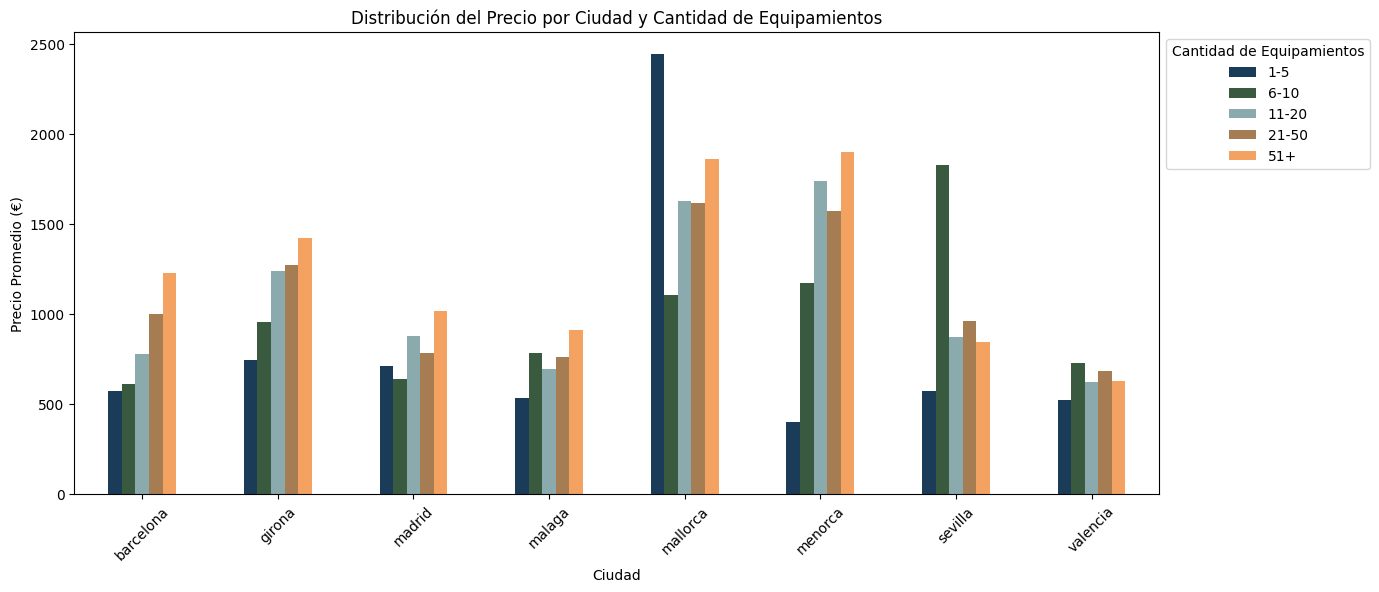

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir segmentos de comodidades (num_amenities) en 5 grupos
bins_amenities = [0, 5, 10, 20, 50, 100]  # Definir los rangos
labels_amenities = ["1-5", "6-10", "11-20", "21-50", "51+"]  # Etiquetas

# Crear nueva columna con los segmentos de comodidades
df["amenities_segment"] = pd.cut(df["num_amenities"], bins=bins_amenities, labels=labels_amenities, include_lowest=True)

# Agrupar por ciudad y segmento de comodidades, calculando el precio promedio
df_grouped_amenities = df.groupby(["city", "amenities_segment"])["price"].mean().unstack()

# Definir la nueva paleta de colores con mayor contraste
colors = ["#1B3C59", "#3A5A40", "#8BAAAD", "#A67C52", "#F4A261", 
          "#264653", "#A8DADC", "#457B9D", "#E63946", "#F4E285", 
          "#2A9D8F", "#6D597A", "#B5838D"]

# Crear el gráfico de barras agrupadas (no apiladas)
df_grouped_amenities.plot(kind="bar", stacked=False, figsize=(14,6), color=colors)

# Personalización del gráfico
plt.title("Distribución del Precio por Ciudad y Cantidad de Equipamientos")
plt.xlabel("Ciudad")
plt.ylabel("Precio Promedio (€)")
plt.xticks(rotation=45)
plt.legend(title="Cantidad de Equipamientos", bbox_to_anchor=(1,1))
plt.show()

CONCLUSIONES: 

Los equipamientos tienen un impacto muy bajo en el precio 

Coeficiente de correlación: 0.0923, P-valor: 0.0000 → Relación muy débil, aunque estadísticamente significativa, no es un factor clave en la fijación de precios.
Más equipamientos no siempre significa precios más altos 

En la mayoría de las ciudades, los alojamientos con más de 51 equipamientos no muestran un gran salto en el precio, lo que sugiere que los viajeros no pagan significativamente más por más comodidades.
Diferencias claras entre ciudades 

Mallorca tiene una anomalía: los alojamientos con menos equipamientos (1-5) tienen precios extremadamente altos, lo que podría deberse a ofertas de lujo con servicios externos en lugar de comodidades internas.
Menorca y Girona muestran una tendencia más lógica, donde más equipamientos suelen asociarse con precios más altos.
Sevilla es la excepción: los alojamientos con 6-10 equipamientos tienen precios más altos que los de 21-50, lo que sugiere que otros factores están influyendo en el precio.
Otros factores son más relevantes en la fijación de precios 

La capacidad del alojamiento (r = 0.4945, p = 0.0000) tiene una correlación mucho más fuerte con el precio, lo que indica que el tamaño es un determinante clave, mientras que el número de equipamientos es un factor secundario.

C:\Users\sguti\AppData\Local\Temp\ipykernel_13612\3836785616.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["review_scores_location"].fillna(0, inplace=True)
C:\Users\sguti\AppData\Local\Temp\ipykernel_13612\3836785616.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_scores = df.groupby(["city", "score_segment"])["

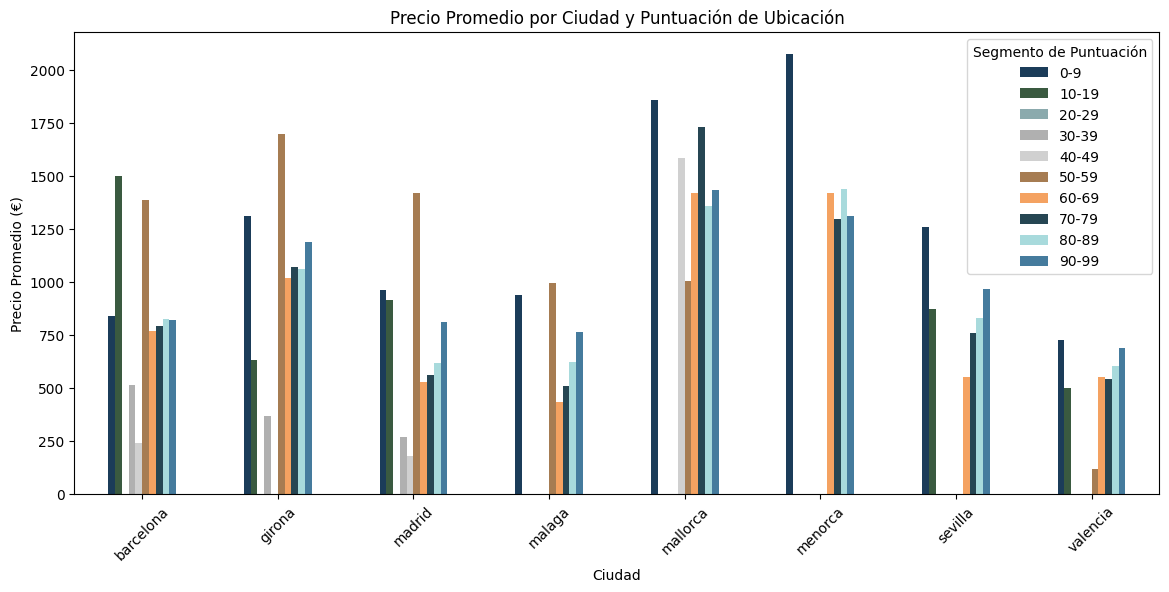

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir segmentos de puntuación en rangos de 10 en 10
bins_scores = list(range(0, 110, 10))  # 0-10, 11-20, ..., 91-100
labels_scores = [f"{i}-{i+9}" for i in range(0, 100, 10)]  # Etiquetas para cada rango

# Asegurar que no haya valores nulos en review_scores_location  
df["review_scores_location"].fillna(0, inplace=True)

# Crear la nueva columna con los segmentos de puntuación
df["score_segment"] = pd.cut(df["review_scores_location"], bins=bins_scores, labels=labels_scores, include_lowest=True)

# Agrupar por ciudad y segmento de puntuación, calculando el precio promedio
df_grouped_scores = df.groupby(["city", "score_segment"])["price"].mean().unstack()

# Ajustar los tonos de los grises para que sean más oscuros
colors = ["#1B3C59", "#3A5A40", "#8BAAAD", "#B0B0B0", "#D0D0D0", 
          "#A67C52", "#F4A261", "#264653", "#A8DADC", "#457B9D", 
          "#E63946", "#F4E285", "#2A9D8F", "#6D597A", "#B5838D"]

# Crear el gráfico de barras agrupadas
df_grouped_scores.plot(kind="bar", stacked=False, figsize=(14,6), color=colors)

# Personalización del gráfico
plt.title("Precio Promedio por Ciudad y Puntuación de Ubicación")
plt.xlabel("Ciudad")
plt.ylabel("Precio Promedio (€)")
plt.xticks(rotation=45)
plt.legend(title="Segmento de Puntuación", bbox_to_anchor=(1,1))
plt.show()

CONCLUSIONES:

La puntuación de ubicación sigue teniendo un impacto bajo en el precio 

Coeficiente de correlación: -0.1413, P-valor: 0.0000 → Aunque estadísticamente significativo, el impacto real es débil y no es determinante en la fijación de precios.
Ciudades turísticas con precios altos en ubicaciones mal valoradas 

En Mallorca y Menorca, algunos alojamientos con bajas puntuaciones siguen teniendo precios elevados, probablemente por exclusividad o demanda alta.
Variabilidad según la ciudad 

Sevilla y Valencia tienen precios más alineados con la puntuación de ubicación.
En Madrid y Girona, la relación es menos clara, lo que indica que otros factores afectan más el precio.
Otros factores son más relevantes que la ubicación 

La capacidad del alojamiento (r = 0.4945, p = 0.0000) tiene un impacto mucho mayor en el precio, reforzando que el tamaño del alojamiento es clave en la fijación de precios.

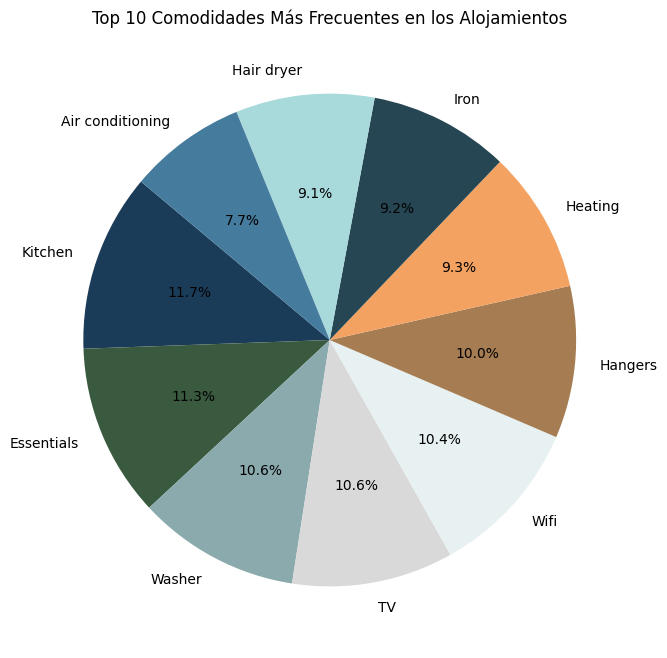

In [42]:
import matplotlib.pyplot as plt
from collections import Counter

# Definir la nueva paleta de colores
colors = ["#1B3C59", "#3A5A40", "#8BAAAD", "#D9D9D9", "#E8F1F2", 
          "#A67C52", "#F4A261", "#264653", "#A8DADC", "#457B9D"]

# Contar las comodidades más repetidas
amenities_flat = [amenidad.strip() for lista in df["amenities_list"] for amenidad in lista]
amenities_count = Counter(amenities_flat)

# Obtener las 10 comodidades más comunes
top_10_amenities = amenities_count.most_common(10)

# Extraer nombres y valores
labels, values = zip(*top_10_amenities)

# Crear gráfico de pastel
plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Top 10 Comodidades Más Frecuentes en los Alojamientos")
plt.show()


# Propuestas de Negocio
1. Estrategias basadas en los datos analizados<br>
1.1. Precio y Capacidad<br>
Hallazgo: Los alojamientos con mayor capacidad suelen tener precios más altos, especialmente en destinos como Mallorca y Menorca.<br>
Recomendación: Optimizar precios dinámicamente según la capacidad y la temporada. Se pueden ofrecer descuentos por grupos grandes para mejorar la ocupación en ciudades donde la demanda es menor.<br>
Inspiración de la competencia: Expedia y Booking ya aplican estrategias de precios dinámicos según la demanda y eventos locales.<br>
Acción: Implementar un sistema de ajuste automático de tarifas basado en ocupación y demanda estacional.<br>
1.2. Precio y Amenities<br>
Hallazgo: Ciertas comodidades como WiFi, aire acondicionado y cocina aparecen entre las más comunes, pero no todas impactan significativamente en el precio.<br>
Recomendación: Destacar alojamientos con amenities premium en la plataforma, permitiendo filtros avanzados para diferenciar propiedades con servicios exclusivos.<br>
Inspiración de la competencia: Airbnb enfatiza alojamientos únicos y experiencias locales.<br>
Acción: Crear una categoría de alojamientos "premium" o "eco-friendly" con amenities diferenciadas, similar a Booking y Expedia.<br>
1.3. Precio y Review Scores Location
Hallazgo: La puntuación de ubicación tiene una relación significativa con el precio, especialmente en ciudades más turísticas.<br>
Recomendación: Implementar segmentación de precios basada en la ubicación y mejorar la visibilidad de alojamientos en zonas mejor puntuadas.<br>
Inspiración de la competencia: Booking usa un sistema de ubicación avanzada con mapas interactivos y puntuaciones.<br>
Acción: Implementar un filtro de búsqueda que permita ordenar alojamientos por puntuación de ubicación para facilitar la toma de decisiones.<br>

2. Estrategias inspiradas en la competencia<br>
2.1. Implementar una estrategia de precios más competitiva<br>
Hallazgo: Competidores como Expedia y Booking aplican precios dinámicos y descuentos por reservas anticipadas.<br>
Acción: Ofrecer descuentos según:<br>
Duración de la estancia (más noches = mejor tarifa).<br>
Anticipación de la reserva (reservas con +30 días de antelación = descuento adicional).<br>
Ofertas de última hora (descuentos en alojamientos con baja ocupación).<br>
2.2. Mejorar la presentación de los alojamientos<br>
Hallazgo: Airbnb y Expedia destacan por sus imágenes de alta calidad y descripciones detalladas.<br>
Acción:<br>
Exigir a los anfitriones fotos de alta resolución.<br>
Implementar una descripción automática de las ventajas del alojamiento según sus amenities.<br>
Añadir reseñas destacadas en cada alojamiento.<b>
2.3. Expansión de servicios y fidelización de clientes<br>
Hallazgo: Booking y Expedia tienen programas de fidelización, pero Airbnb carece de uno fuerte.<br>
Acción: Crear un programa de fidelización que ofrezca:<br>
Descuentos en futuras reservas.<br>
Beneficios exclusivos para clientes recurrentes.<br>
Recompensas por referir nuevos usuarios.<br>
